# MVP CP2: Conway's Game of Life Plots

In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# For fitting
from iminuit import Minuit

## Distribution of times to reach steady state

### 50x50 lattice with random initial configuration

In [2]:
# Read in data
ss_data = pd.read_csv('GOL_ss_times.csv', header=1)

In [3]:
ss_data

,Time
0,0.056
1,0.460
2,0.228
3,0.568
4,0.788
...,...
495,0.540
496,0.352
497,0.536
498,0.468


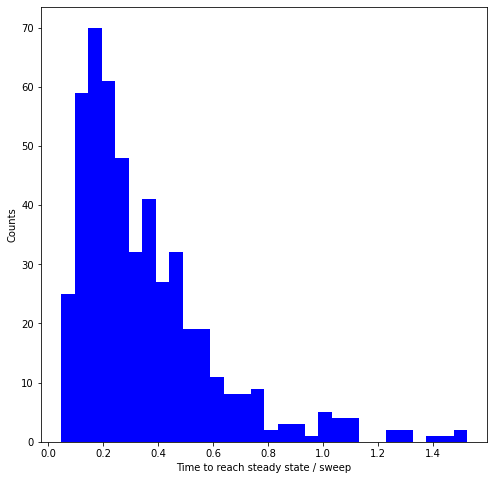

In [23]:
# Plot histogram
ss_times = ss_data['Time']
n_bins = 30
fig, ax = plt.subplots(figsize=(8, 8))
ax.hist(ss_times, bins=n_bins, color='b')
ax.set_xlabel('Time to reach steady state / sweep')
ax.set_ylabel('Counts')
plt.show()

Time is in sweeps so 0.2 sweeps is 500 frames for 50x50 lattice.

## Glider speed fit

In [5]:
glider_data = pd.read_csv('GOL_glider_com.csv', header=1)

In [6]:
glider_data

,Time,x_com,y_com
0,0.0,25.2,25.4
1,1.0,25.2,25.8
2,2.0,25.4,26.2
3,3.0,25.8,26.2
4,4.0,26.2,26.4
...,...,...,...
295,295.0,NaN,NaN
296,296.0,NaN,NaN
297,297.0,NaN,NaN
298,298.0,NaN,NaN


NaN values as expected where glider crosses boundaries and COM is not measured.

In [7]:
glider_times, x_com, y_com = glider_data['Time'], glider_data['x_com'], glider_data['y_com']

In [8]:
glider_times

0        0.0
1        1.0
2        2.0
3        3.0
4        4.0
       ...  
295    295.0
296    296.0
297    297.0
298    298.0
299    299.0
Name: Time, Length: 300, dtype: float64

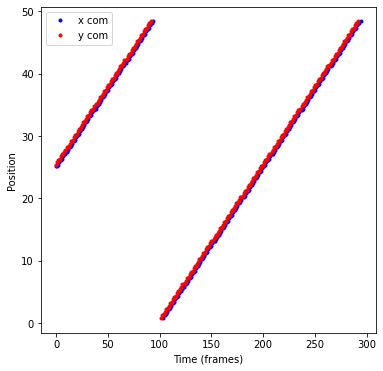

In [9]:
# Plot raw data
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(glider_times, x_com, '.b', label='x com')
ax.plot(glider_times, y_com, '.r', label='y com')
ax.set_xlabel('Time (frames)')
ax.set_ylabel('Position')
ax.legend()
plt.show()

We see that at time = 100 frames the boundary is crossed. So will slice data after time = 100 for linear fit

In [10]:
cut_glider_times = glider_times[100:]
cut_x_com = x_com[100:]
cut_y_com = y_com[100:]

In [11]:
# Fit a linear function
def linear(t, m, c):
    return m*t + c

# Non-weighted least squared loss function
def LSQx(m, c):
    return np.sum((x_com - linear(cut_glider_times, m, c)) ** 2)

def LSQy(m, c):
    return np.sum((y_com - linear(cut_glider_times, m, c)) ** 2)

In [12]:
# Fit with minutuit given reasonable initial guesses
fitx = Minuit(LSQx, m=0.5, c=-10)
# Error definition for LSQ is when loss function increases by 1
fitx.errordef = 1.0
fitx.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.52                       │              Nfcn = 41               │
│ EDM = 7.48e-21 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │  0.2500   │  0.0013   │            │            │         │         │       │
│ 1 │ c    │  -24.97   │   0.27    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         m         c │
├───┼─────────────────────┤
│ m │   1.7e-06 -0.000337 │
│ c │ -0.000337     0.072 │
└───┴─────────────────────┘

In [13]:
fity = Minuit(LSQy, m=0.5, c=-10)
fity.errordef = 1.0
fity.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.52                       │              Nfcn = 43               │
│ EDM = 4.8e-20 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ m    │  0.2500   │  0.0013   │            │            │         │         │       │
│ 1 │ c    │  -24.47   │   0.27    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         m         c │
├───┼─────────────────────┤
│ m │   1.7e-06 -0.000333 │
│ c │ -0.000333    0.0707 │
└───┴─────────────────────┘

In [14]:
# Get best estimates and error on gradients
mx, cx = fitx.values['m'], fitx.values['c']
my, cy = fity.values['m'], fity.values['c']
mx_err = fitx.errors['m']
my_err = fity.errors['m']

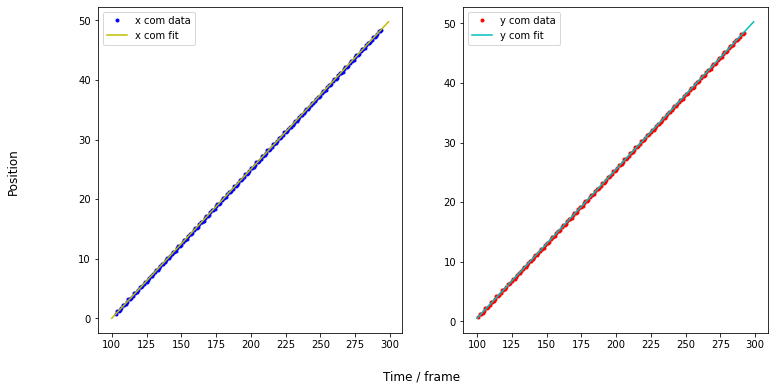

In [15]:
# Plot data with fit layed on top
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].plot(cut_glider_times, cut_x_com, '.b', label='x com data')
axs[0].plot(cut_glider_times, linear(cut_glider_times, mx, cx), '-y', label='x com fit')
axs[0].legend()
axs[1].plot(cut_glider_times, cut_y_com, '.r', label='y com data')
axs[1].plot(cut_glider_times, linear(cut_glider_times, my, cy), '-c', label='y com fit')
axs[1].legend()
fig.supxlabel('Time / frame')
fig.supylabel('Position')
plt.show()

In [16]:
# Gradient gives component of speed so for overall speed, add both in quadrature
speed = np.sqrt(mx**2 + my**2)
# Error given by propagation of errors from fit
speed_err = np.sqrt(((mx*mx_err)**2 + (my*my_err)**2)/(mx**2 + my**2))
print('glider speed = ({}{}{}) cells per frame'.format(round(speed, 4), u'\u00B1', round(speed_err, 4)))

glider speed = (0.3535±0.0013) cells per frame
